In [1]:
import os 
import numpy as np
from numpy import random
import tensorflow as tf
import pandas as pd  
import matplotlib.pyplot as plt  
import sys
#You have freedom of using eager execution in tensorflow
#Instead of using With tf.Session() as sess you can use sess.run() whenever needed
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def computeGrad(X,y,theta,reg): # returns nabla
# WRITEME: write your code here to complete the routine
    W, b = theta[0], theta[1]
    f = tf.matmul(X,W) + b
    _, _, df = softmax_loss(f,y)
    dW = tf.matmul(tf.transpose(X), df) + reg * W
    db = tf.reduce_sum(df, axis=0)
    return (dW,db)

In [3]:
##############################################################
def softmax_loss(X, y):
# Forward pass
    N = int(X.shape[0])
    exp_vals = tf.exp(X)
    probs = exp_vals / tf.reduce_sum(exp_vals, axis=1, keepdims=True)
    loss = -np.mean(np.log(probs.eval()[range(N), y]))


# Backward pass
    dX = tf.convert_to_tensor(probs).eval()
    dX[range(N), y] -= 1
    dX /= N
    return loss, probs, dX
##############################################################


In [4]:
def computeCost(X,y,theta,reg):
    # WRITEME: write your code here to complete the routine
    ############################
    W, b = theta[0], theta[1]
    N = X.shape[0]
    f = tf.matmul(X,W) + b
    data_loss, _, _ = softmax_loss(f,y)
    reg_loss = 0.5 * reg * tf.reduce_sum(W**2)
    cost = data_loss + reg_loss
    
    ###########################
    return cost

In [5]:
def predict(X,theta):
    # WRITEME: write your code here to complete the routine
    ###############################
    W, b = theta[0], theta[1]
    ##############################
    # evaluate class scores
    scores = tf.matmul(X,W) + b
    # compute the class probabilities
    _, probs, _ = softmax_loss(scores,y)

    return (scores,probs)


In [6]:
np.random.seed(0) #Provide your unique Random seed
# Load in the data from disk
path = os.getcwd() + '/spiral_train.dat'  
data = pd.read_csv(path, header=None) 


In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 


In [8]:
# convert from data frames to numpy matrices
X = np.array(X.values)  
y = np.array(y.values)
y = y.flatten()

X_tf = tf.constant(X)
Y_tf = tf.constant(y)
# initialize parameters randomly
D = X.shape[1]
K = np.amax(y) + 1

In [9]:
#Train a Linear Classifier
#You will be using X_tf and Y_tf within your session , numpy variables are provided to do sanity check
# initialize parameters randomly
initializer = tf.random_normal_initializer(mean=0.0, stddev=0.01, seed=None, dtype=tf.float64)
W = tf.Variable(initializer([D, K]),dtype=tf.float64)
b = tf.Variable(tf.random_normal([K],dtype=tf.float64),dtype=tf.float64)
theta = (W,b)

In [10]:
# some hyperparameters
n_e = 100
check = 10 # every so many pass/epochs, print loss/error to terminal
#step_size = 1e-0
step_size = 1.0
reg = 0.001 # regularization strength

loss_vs_epochs = []


In [11]:
# gradient descent loop
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    for i in xrange(n_e):
        #print(i)
        # WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
        ################################################
        theta = (W, b)
        loss = computeCost(X,y,theta,reg).eval()
        loss_vs_epochs.append(loss)
        
        ###############################################
        
        if True:
            print "iteration %d: loss %f" % (i, loss)

        # perform a parameter update
        # WRITEME: write your update rule(s) here
        
        ################################################
        dW, db = computeGrad(X,y,theta,reg)
        W = W - step_size*dW
        b = b - step_size*db
        
        ##############################################
 
# TODO: remove this line below once you have correctly implemented/gradient-checked your various sub-routines
#sys.exit(0) 
  
# evaluate training set accuracy
    scores, probs = predict(X,theta)
    predicted_class = sess.run(tf.argmax(scores, axis=1)) 
    print ('training accuracy: %.2f%%' % (100*np.mean(predicted_class == y)))
    



Instructions for updating:
Use `tf.global_variables_initializer` instead.
iteration 0: loss 1.780779
iteration 1: loss 1.398295
iteration 2: loss 1.181821
iteration 3: loss 1.076710
iteration 4: loss 1.023945
iteration 5: loss 0.993006
iteration 6: loss 0.971601
iteration 7: loss 0.954907
iteration 8: loss 0.940926
iteration 9: loss 0.928759
iteration 10: loss 0.917950
iteration 11: loss 0.908240
iteration 12: loss 0.899459
iteration 13: loss 0.891484
iteration 14: loss 0.884218
iteration 15: loss 0.877583
iteration 16: loss 0.871509
iteration 17: loss 0.865938
iteration 18: loss 0.860820
iteration 19: loss 0.856110
iteration 20: loss 0.851767
iteration 21: loss 0.847757
iteration 22: loss 0.844049
iteration 23: loss 0.840615
iteration 24: loss 0.837431
iteration 25: loss 0.834474
iteration 26: loss 0.831725
iteration 27: loss 0.829166
iteration 28: loss 0.826781
iteration 29: loss 0.824556
iteration 30: loss 0.822478
iteration 31: loss 0.820535
iteration 32: loss 0.818717
iteration 33

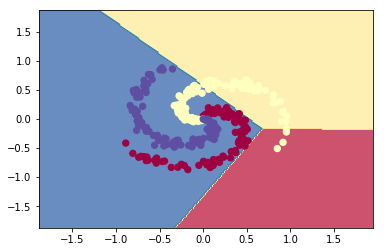

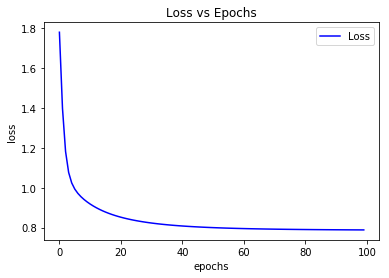

In [12]:
# plot the resulting classifier
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx1 = xx.ravel()
yy1 = yy.ravel()

with tf.Session() as sess:
    sess.run(init)
    Z = np.dot(np.c_[xx1, yy1], W.eval()) + b.eval()
    
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')
plt.savefig(os.getcwd() + '/DLAssign2Problem1b/spiral_linear')

plt.show()

plt.figure()
plt.plot(loss_vs_epochs, color = 'b', label = "Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss vs Epochs")
plt.legend(loc="best")
plt.savefig(os.getcwd() + '/DLAssign2Problem1b/Loss vs Epoch')
plt.show() # convenience command to force plots to pop up on desktop

